In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [2]:
df = pd.read_csv("sunrises_2025.csv")

df['date'] = pd.to_datetime(df['date'])
time_cols = ['sunrise', 'sunset', 'nautical_twilight_begin', 'civil_twilight_begin']
for col in time_cols:
    df[col] = pd.to_datetime(df[col], utc=True).dt.tz_convert("Europe/Warsaw")
df.head()

,date,sunrise,sunset,nautical_twilight_begin,civil_twilight_begin,day_length
0,2025-01-01,2025-01-01 08:03:21+01:00,2025-01-01 15:34:52+01:00,2025-01-01 06:35:45+01:00,2025-01-01 07:22:00+01:00,27091
1,2025-01-02,2025-01-02 08:03:07+01:00,2025-01-02 15:36:02+01:00,2025-01-02 06:35:40+01:00,2025-01-02 07:21:52+01:00,27175
2,2025-01-03,2025-01-03 08:02:50+01:00,2025-01-03 15:37:15+01:00,2025-01-03 06:35:33+01:00,2025-01-03 07:21:40+01:00,27265
3,2025-01-04,2025-01-04 08:02:28+01:00,2025-01-04 15:38:31+01:00,2025-01-04 06:35:22+01:00,2025-01-04 07:21:25+01:00,27363
4,2025-01-05,2025-01-05 08:02:03+01:00,2025-01-05 15:39:49+01:00,2025-01-05 06:35:08+01:00,2025-01-05 07:21:06+01:00,27466


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype                        
---  ------                   --------------  -----                        
 0   date                     365 non-null    datetime64[ns]               
 1   sunrise                  365 non-null    datetime64[ns, Europe/Warsaw]
 2   sunset                   365 non-null    datetime64[ns, Europe/Warsaw]
 3   nautical_twilight_begin  365 non-null    datetime64[ns, Europe/Warsaw]
 4   civil_twilight_begin     365 non-null    datetime64[ns, Europe/Warsaw]
 5   day_length               365 non-null    int64                        
dtypes: datetime64[ns, Europe/Warsaw](4), datetime64[ns](1), int64(1)
memory usage: 17.2 KB


In [20]:
df['nautical_hour'] = (
    df['nautical_twilight_begin'].dt.hour +
    df['nautical_twilight_begin'].dt.minute / 60 +
    df['nautical_twilight_begin'].dt.second / 3600
)
df['sunrise_hour'] = (
    df['sunrise'].dt.hour +
    df['sunrise'].dt.minute / 60 +
    df['sunrise'].dt.second / 3600
)
df['civil_hour'] = (
    df['civil_twilight_begin'].dt.hour +
    df['civil_twilight_begin'].dt.minute / 60 +
    df['civil_twilight_begin'].dt.second / 3600
)

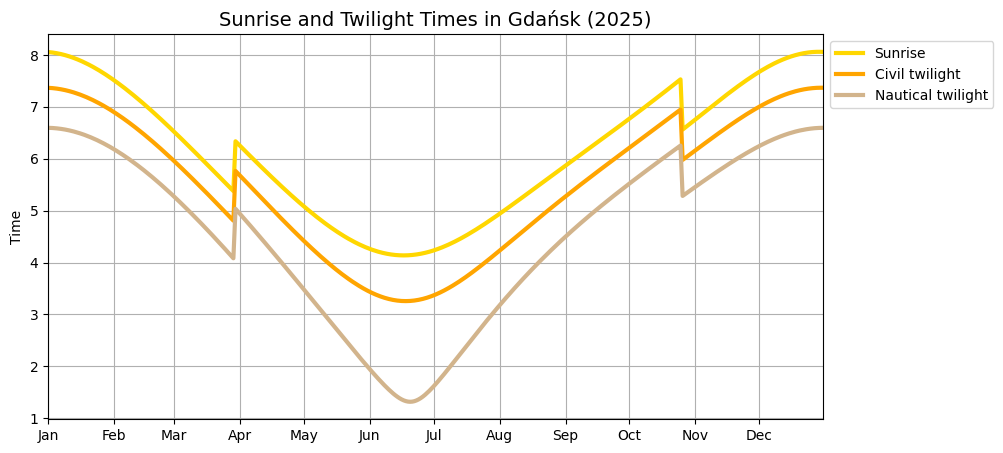

In [78]:
x = df['date']
y_nautical = df['nautical_hour']
y_sunrise = df['sunrise_hour']
y_civil = df['civil_hour']

plt.figure(figsize=(10,5))

plt.plot(x, y_sunrise, label='Sunrise', lw=3, color='gold')
plt.plot(x, y_civil, label='Civil twilight', lw=3, color='orange')
plt.plot(x, y_nautical, label='Nautical twilight', lw=3, color='tan')

plt.xlim(df['date'].min(), df['date'].max())
plt.grid()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) 
plt.legend(loc='upper left', bbox_to_anchor=(1,1), framealpha=0.8)
plt.ylabel('Time')
plt.title("Sunrise and Twilight Times in Gdańsk (2025)", fontsize=14)

plt.savefig("nautical_twilight.png", dpi=300, bbox_inches='tight')
plt.show()